<a href="https://colab.research.google.com/github/mohammedbasithpm964/Al-ML-Tasks-and-Projects/blob/main/HPP_Sqft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/housing_price_dataset.csv")

In [ ]:
dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
dataset.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


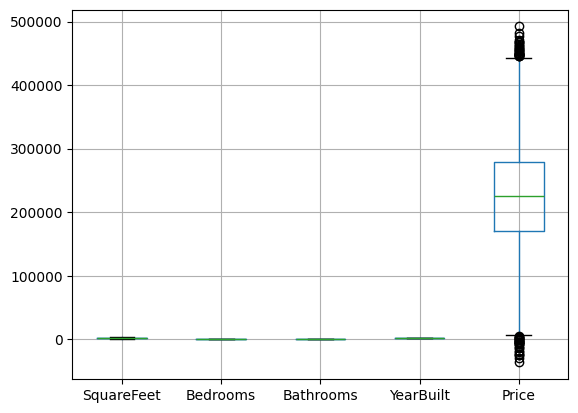

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Import the pyplot module

# ... (your existing code) ...

dataset.boxplot()
plt.show() # Call plt.show() directly

In [ ]:
# prompt: Using dataframe dataset: remove outliers for the column price using IQR

# Calculate Q1 and Q3 for the 'Price' column
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
dataset_no_outliers = dataset[(dataset['Price'] >= lower_bound) & (dataset['Price'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(dataset)}")
print(f"Number of rows after removing outliers: {len(dataset_no_outliers)}")


Number of rows before removing outliers: 50000
Number of rows after removing outliers: 49941


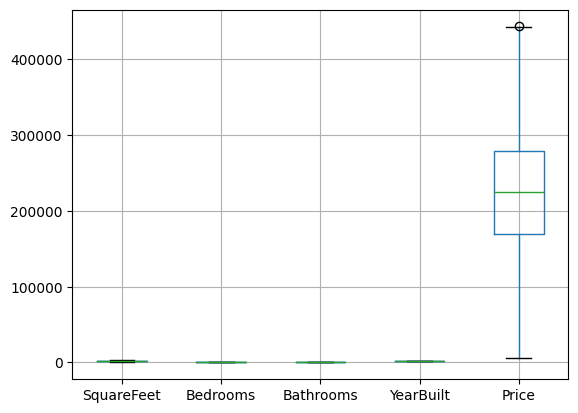

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module


dataset_no_outliers.boxplot()
plt.show() # Call plt.show() directly

In [ ]:
dataset=dataset_no_outliers

In [ ]:
independent=dataset[["SquareFeet"]]

In [ ]:
dependent=dataset[["Price"]]

In [ ]:
dependent

,Price
0,215355.283618
1,195014.221626
2,306891.012076
3,206786.787153
4,272436.239065
...,...
49995,100080.865895
49996,374507.656727
49997,384110.555590
49998,380512.685957


In [ ]:
independent

,SquareFeet
0,2126
1,2459
2,1860
3,2294
4,2130
...,...
49995,1282
49996,2854
49997,2979
49998,2596


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

array([[265911.43058933],
       [175747.71991006],
       [202796.83311384],
       ...,
       [152364.6037339 ],
       [276711.25967069],
       [275522.28766174]])

In [ ]:
y_test

,Price
45773,269429.362885
29088,161719.056526
42376,88472.755598
12109,194411.707661
2167,162462.552198
...,...
5399,248769.895895
22401,310595.689498
29855,96922.065353
34881,287706.250211


In [ ]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [ ]:
r_score

0.5566159561556572

In [ ]:
import pickle


In [ ]:
filename="housing_price_pred.sav"

In [ ]:
pickle.dump(regressor,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open("housing_price_pred.sav",'rb'))
# The data has 3 values but only 1 column was specified.
# Adding column names for the other 2 values to match the data
new_data = pd.DataFrame([[2456,]], columns=['SquareFeet'])
result=loaded_model.predict(new_data)

In [ ]:
result

array([[269478.3466162]])